### Author: Muhammad Bilal Khan

### Goal

In this notebook, I intend to utilize the UCI Heart Disease Dataset [link uci-heart-disease](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data) to develop and train a machine learning model. The goal is to accurately predict the presence of heart disease in individuals by analyzing a range of health-related factors. Through this process, I'll apply various data preprocessing and machine learning techniques to create a model that can serve as a valuable tool in identifying potential heart disease risks based on clinical parameters.

I will employ the following machine learning models:

  - Simple Imputer model
  - Random Forest model

I will be using the following measurement metrics to determine whether the model is appropriate for the patient:

  - Accuracy score
  - Precision score
  - Recall score
  - F1 score

### Dataset 
The UCI Heart Disease dataset contains a collection of features that are used to predict the presence of heart disease in patients. Each row in the dataset represents a different patient, and the columns represent various attributes related to their health and heart disease status.  The dataset is  collected from 

  #### Dataset Overview

- **Number of Instances:** (total number of patients are 920)
- **Number of Attributes:** (total number of features excluding the target variable are 15)
- **Target Variable:** `num` (indicates the presence of heart disease in the patient)
  - The num variable in the UCI Heart Disease dataset is typically used to indicate the presence and severity of heart disease based on angiographic disease status. The values of num generally range from 0 to 4, with each number representing a different level of severity:

0: No presence of heart disease.
1: Mild or some presence of heart disease.
2: Moderate presence of heart disease.
3: Severe presence of heart disease.
4: Very severe presence of heart disease.

  #### Column Descriptions

Below is a description of each feature included in the dataset:

- `id`: Unique identifier for each patient.
- `age`: Age of the patient in years.
- `origin`: Place of study where the data was collected.
- `sex`: Gender of the patient. Values are Male or Female.
- `cp`: Chest pain type. Categories include:
  - `typical angina`
  - `atypical angina`
  - `non-anginal`
  - `asymptomatic`
- `trestbps`: Resting blood pressure in mm Hg on admission to the hospital.
- `chol`: Serum cholesterol in mg/dl.
- `fbs`: Indicates if fasting blood sugar is greater than 120 mg/dl (True or False).
- `restecg`: Resting electrocardiographic results. Categories include:
  - `normal`
  - `stt abnormality`
  - `lv hypertrophy`
- `thalach`: Maximum heart rate achieved.
- `exang`: Exercise-induced angina (True or False).
- `oldpeak`: ST depression induced by exercise relative to rest.
- `slope`: The slope of the peak exercise ST segment.
- `ca`: Number of major vessels (0-3) colored by fluoroscopy.
- `thal`: Thalassemia category. Categories include:
  - `normal`
  - `fixed defect`
  - `reversible defect`
- `num`: The predicted attribute, diagnosis of heart disease (angiographic disease status).
  - The num variable in the UCI Heart Disease dataset is typically used to indicate the presence and severity of heart disease based on angiographic disease status. The values of num generally range from 0 to 4, with each number representing a different level of severity:

    - 0: No presence of heart disease.
    - 1: Mild or some presence of heart disease.
    - 2: Moderate presence of heart disease.
    - 3: Severe presence of heart disease.
    - 4: Very severe presence of heart disease.

### Acknowledgements

- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.


In [1]:
# Importing necessary libraries for data manipulation, analysis, and visualization: pandas, numpy, matplotlib, and seaborn.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer


### Load Dataset

In [2]:
# read data
df = pd.read_csv('data/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Inspect dataset

In [14]:
# Check the shape of the data
df.shape

print('-' * 50)
print('Observations from dataset inspection:')
print('-' * 50)

print(f"There are {df.shape[0]} patients and {df.shape[1]} features in the dataset.")

--------------------------------------------------
Observations from dataset inspection:
--------------------------------------------------
There are 920 patients and 16 features in the dataset.


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


This function `print_heading` is used to print a provided heading text surrounded by lines. It takes one argument, `heading`, which is the text to be printed as the heading. The function prints 50 hyphen characters, then the heading text, and then another 50 hyphen characters to create a clear and distinct section in the output.

In [20]:
# print heading
def print_heading(heading):
    print('-' * 50)
    print(heading)
    print('-' * 50)

In [22]:
print_heading("DATASET INFORMATION SUMMARY")

print("1. The dataset contains 920 entries across 16 features pertinent to heart disease studies.")
print("2. Complete data is available for 'id', 'age', 'sex', 'dataset', 'cp', and the outcome variable 'num'.")
print("3. Significant missing data is found in 'ca' with 66.41% missing.")
print("4. Significant missing data is found in 'thal' with 52.83% missing.")
print("5. 'Slope' also has a considerable amount of missing data, with only 611 non-null entries.")
print("6. Variables 'trestbps', 'chol', 'fbs', 'thalch', 'exang', and 'oldpeak' have some missing values but to a lesser extent.")

--------------------------------------------------
DATASET INFORMATION SUMMARY
--------------------------------------------------
1. The dataset contains 920 entries across 16 features pertinent to heart disease studies.
2. Complete data is available for 'id', 'age', 'sex', 'dataset', 'cp', and the outcome variable 'num'.
3. Significant missing data is found in 'ca' with 66.41% missing.
4. Significant missing data is found in 'thal' with 52.83% missing.
5. 'Slope' also has a considerable amount of missing data, with only 611 non-null entries.
6. Variables 'trestbps', 'chol', 'fbs', 'thalch', 'exang', and 'oldpeak' have some missing values but to a lesser extent.


### Summary statistics

In [3]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


#### Observations from the summary statistics

In [24]:

print_heading('Observations from summary statistics'.upper())

print(f"1. There are no heart diseases found in the 25% of the patients with an average of age {df.describe().loc['25%', 'age']}.")
print(f"2. There is mild presence of heart diseases found in the 50% of the patients with an average of age {df.describe().loc['50%', 'age']}.")
print(f"3. There is moderate presence of heart diseases found in the 75% of the patients with an average of age {df.describe().loc['75%', 'age']} or more.")

--------------------------------------------------
OBSERVATIONS FROM SUMMARY STATISTICS
--------------------------------------------------
1. There are no heart diseases found in the 25% of the patients with an average of age 47.0.
2. There is mild presence of heart diseases found in the 50% of the patients with an average of age 54.0.
3. There is moderate presence of heart diseases found in the 75% of the patients with an average of age 60.0 or more.


### Missing values

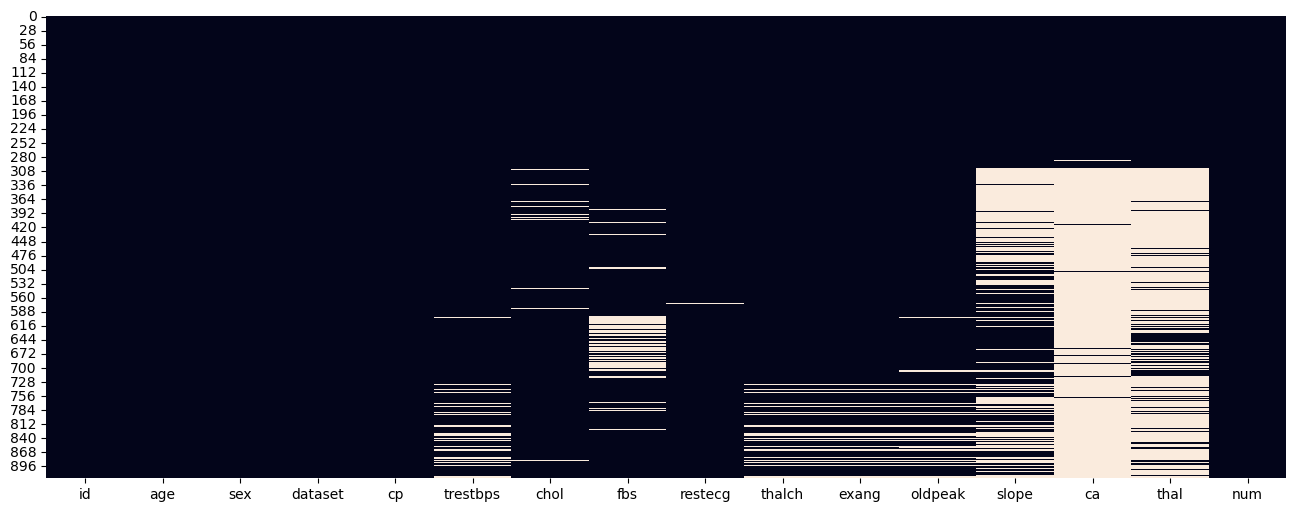

In [197]:
# Plot the heatmap on dataset to check the missing values 
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [10]:
round(((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False),2)

ca          66.41
thal        52.83
slope       33.59
fbs          9.78
oldpeak      6.74
trestbps     6.41
thalch       5.98
exang        5.98
chol         3.26
restecg      0.22
id           0.00
age          0.00
sex          0.00
dataset      0.00
cp           0.00
num          0.00
dtype: float64

In [26]:

print_heading('Observations from missing values'.upper())

print("1. The dataset shows significant gaps in key features, with 'ca' and 'thal' being the most affected, missing 66.41% and 52.83% of their data, respectively.\n"
      "2. 'Slope' also has a substantial 33.59% of values missing.\n"
      "3. These high levels of incompleteness are likely to pose challenges for any predictive analysis.\n"
      "4. Advanced imputation techniques may be necessary to address the deficiencies before any reliable model training can be conducted.")

--------------------------------------------------
OBSERVATIONS FROM MISSING VALUES
--------------------------------------------------
1. The dataset shows significant gaps in key features, with 'ca' and 'thal' being the most affected, missing 66.41% and 52.83% of their data, respectively.
2. 'Slope' also has a substantial 33.59% of values missing.
3. These high levels of incompleteness are likely to pose challenges for any predictive analysis.
4. Advanced imputation techniques may be necessary to address the deficiencies before any reliable model training can be conducted.


#### Applying the SimpleImputer method to handle smaller percentages of missing values

In [66]:
# Automatically find numerical and categorical columns with missing values less than 10%
missing_threshold = 10  # 10% threshold for missing values
total_entries = len(df)
target_variable = 'num'

# Identify columns by their data type and missing value percentage
numerical_cols = [
    col 
    for col in df.columns 
    if (
        (df[col].dtype in ['int64', 'float64']) and 
        (df[col].isnull().sum() / total_entries * 100) < missing_threshold and 
        col != target_variable
    )
]
categorical_cols = [col
                   for col in df.columns 
                   if (
                        df[col].dtype == 'object') and 
                        (df[col].isnull().sum() / total_entries * 100) < missing_threshold]


num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

for col in numerical_cols:
    df.loc[:,col] = num_imputer.fit_transform(df[[col]])

for col in categorical_cols:
    df.loc[:, col] = cat_imputer.fit_transform(df[[col]])

print_heading('Observations from missing values after imputation'.upper())

--------------------------------------------------
OBSERVATIONS FROM MISSING VALUES AFTER IMPUTATION
--------------------------------------------------
